In [28]:
import sys
import os
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import pandas as pd

from keras import callbacks
from keras.models import Sequential
from keras.layers import Conv2D,Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
base_path = "gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/"
full_real_path = base_path + "train/training_real/"
full_fake_path = base_path + "train/training_fake/"

pred_path = base_path + "test/"

model_check_point = base_path + 'model_checkpoint/'

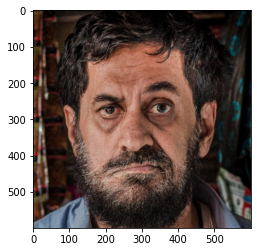

In [31]:
plt.imshow(load_img('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/train/training_real/760.jpg'))

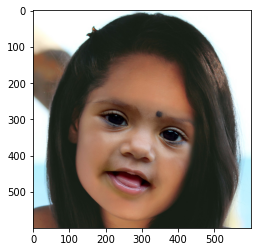

In [32]:
plt.imshow(load_img('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/train/training_fake/0.jpg'))

In [33]:
def get_abspath_label(p_file_path, p_label):
    v_filename = os.listdir(p_file_path)
    v_filename = [p_file_path + s  for s in v_filename]
    v_label = [p_label]*len(v_filename)
    
    return v_filename, v_label
    

In [34]:
def filename_to_arr(p_filename_list):
    arr_list = []
    for lst_ele in p_filename_list:
        v_img = load_img(lst_ele, target_size=(300, 300))
        v_arr = img_to_array(v_img)
        arr_list.append(v_arr)
    return arr_list

In [35]:
def get_resize_image_label(p_file_path, label_num):
    v_filename, v_label = get_abspath_label(p_file_path, 0)
    v_rsz_arr = filename_to_arr(v_filename)
    
    return v_rsz_arr
    

In [36]:
full_real_filename, full_real_label = get_abspath_label(full_real_path, 0)
print(len(full_real_filename), len(full_real_label))

full_fake_filename, full_fake_label = get_abspath_label(full_fake_path, 1)
print(len(full_fake_filename), len(full_fake_label))

full_pred_filename, full_pred_label = get_abspath_label(pred_path, 0)
print(len(full_pred_filename))

949 949
767 767
332


In [37]:
full_size_real = len(full_real_filename)
train_size_real = 760
test_size_real = full_size_real - train_size_real

full_size_fake = len(full_fake_filename)
train_size_fake = 613
test_size_fake = full_size_fake - train_size_fake


In [38]:
train_real_filename = full_real_filename[0:(train_size_real)]
test_real_filename = full_real_filename[train_size_real:]

train_real_label =  full_real_label[0:(train_size_real)]
test_real_label = full_real_label[train_size_real:]

print(len(train_real_filename) + len(test_real_filename))
print(len(train_real_label) + len(test_real_label))

train_fake_filename = full_fake_filename[0:(train_size_fake)]
test_fake_filename = full_fake_filename[train_size_fake:]

train_fake_label =  full_fake_label[0:(train_size_fake)]
test_fake_label = full_fake_label[train_size_fake:]

print(len(train_real_filename), len(test_real_filename), len(train_real_filename) + len(test_real_filename))
print(len(train_real_label), len(test_real_label), len(train_real_label) + len(test_real_label))

print(len(train_fake_filename), len(test_fake_filename), len(train_fake_filename) + len(test_fake_filename))
print(len(train_fake_label), len(test_fake_label), len(train_fake_label) + len(test_fake_label))

949
949
760 189 949
760 189 949
613 154 767
613 154 767


In [39]:
train_real_rsz_arr = filename_to_arr(train_real_filename)
print(len(train_real_filename), len(train_real_label), len(train_real_rsz_arr))

train_fake_rsz_arr = filename_to_arr(train_fake_filename)
print(len(train_fake_filename), len(train_fake_label), len(train_fake_rsz_arr))

test_real_rsz_arr = filename_to_arr(test_real_filename)
print(len(test_real_filename), len(test_real_label), len(test_real_rsz_arr))

test_fake_rsz_arr = filename_to_arr(test_fake_filename)
print(len(test_fake_filename), len(test_fake_label), len(test_fake_rsz_arr))

pred_rsz_arr = filename_to_arr(full_pred_filename)
print(len(full_pred_filename), len(pred_rsz_arr))

full_real_rsz_arr = filename_to_arr(full_real_filename)
print(len(full_real_filename), len(full_real_label), len(full_real_rsz_arr))

full_fake_rsz_arr = filename_to_arr(full_fake_filename)
print(len(full_fake_filename), len(full_fake_label), len(full_fake_rsz_arr))


760 760 760
613 613 613
189 189 189
154 154 154
332 332
949 949 949
767 767 767


In [40]:
len(train_real_label), len(train_real_label), len(train_real_label)*0.2, len(train_real_label)*0.2

(760, 760, 152.0, 152.0)

In [41]:
len(train_real_filename)*0.2, len(train_fake_label)*0.2

(152.0, 122.60000000000001)

#### Combine Real and Fake arrays and labels

In [42]:
train_rsz_arr = train_real_rsz_arr + train_fake_rsz_arr
test_rsz_arr = test_real_rsz_arr + test_fake_rsz_arr
full_rsz_arr = full_real_rsz_arr + full_fake_rsz_arr

train_label = train_real_label + train_fake_label
test_label = test_real_label + test_fake_label
full_label = full_real_label + full_fake_label

#### Convert image array list to array and normalize

In [43]:
train_nrm_arr = np.asarray(train_rsz_arr).astype('float32')/255
test_nrm_arr = np.asarray(test_rsz_arr).astype('float32')/255
pred_nrm_arr = np.asarray(pred_rsz_arr).astype('float32')/255
full_nrm_arr = np.asarray(full_rsz_arr).astype('float32')/255


train_label = np.asarray(train_label)
test_label = np.asarray(test_label)
full_label = np.asarray(full_label)

In [44]:
train_nrm_arr.shape, test_nrm_arr.shape, train_label.shape, test_label.shape, pred_nrm_arr.shape

((1373, 300, 300, 3), (343, 300, 300, 3), (1373,), (343,), (332, 300, 300, 3))

In [45]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(300, 300, 3)))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(rate=0.2))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(rate=0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = SGD(lr=0.003, momentum=0.9)
  
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [46]:
# keras_callback=[EarlyStopping(monitor='loss',patience=3,mode='min',min_delta=0.01),ModelCheckpoint(model_check_point,monitor='loss',save_best_only=True)]
# model=define_model()
# model.fit(train_nrm_arr, train_label, epochs=20, verbose=1, callbacks=[keras_callback], validation_data=(test_nrm_arr, test_label))

In [47]:
# model.evaluate(test_nrm_arr, test_label, verbose=1)

In [48]:
# out_df = pd.DataFrame(np.where(model.predict(pred_nrm_arr) > 0.5, 1,0)).reset_index().rename(columns={'index':'file_id',0:'label'})
# out_df.to_csv('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/out_rak.csv', index=False)

In [49]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
# define cnn model
def define_tlmodel():
    # load model
    model = VGG16(include_top=False, input_shape=(300, 300, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [50]:
# keras_callback=[EarlyStopping(monitor='loss',patience=5,mode='min',min_delta=0.01),
#                   ModelCheckpoint(model_check_point,monitor='loss',save_best_only=True)]
# tl_model=define_tlmodel()
# tl_model.fit(train_nrm_arr, train_label, epochs=30, verbose=1, callbacks=[keras_callback], validation_data=(test_nrm_arr, test_label))

In [51]:
# out_df = pd.DataFrame(np.where(tl_model.predict(pred_nrm_arr) > 0.5, 1,0)).reset_index().rename(columns={'index':'file_id',0:'label'})
# out_df.to_csv('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/out_rak_tl.csv', index=False)

In [54]:
keras_callback=[EarlyStopping(monitor='loss',patience=5,mode='min',min_delta=0.01),
                  ModelCheckpoint(model_check_point,monitor='loss',save_best_only=True)]
tl_model=define_tlmodel()
tl_model.fit(full_nrm_arr, full_label, epochs=30, verbose=1, callbacks=[keras_callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
54/54 [==============================] - 10s 177ms/step - loss: 0.7417 - accuracy: 0.5408
Epoch 2/30
54/54 [==============================] - 10s 182ms/step - loss: 0.6576 - accuracy: 0.6043
Epoch 3/30
54/54 [==============================] - 10s 177ms/step - loss: 0.6348 - accuracy: 0.6253
Epoch 4/30
54/54 [==============================] - 10s 177ms/step - loss: 0.6108 - accuracy: 0.6614
Epoch 5/30
54/54 [==============================] - 10s 182ms/step - loss: 0.6056 - accuracy: 0.6597
Epoch 6/30
54/54 [==============================] - 8s 140ms/step - loss: 0.6112 - accuracy: 0.6638
Epoch 7/30
54/54 [==============================] - 9s 176ms/step - loss: 0.5810 - accuracy: 0.6900
Epoch 8/30
54/54 [==============================] - 10s 181ms/step - loss: 0.5615 - accuracy: 0.7057
Epoch 9/30
54/54 [==============================] - 10s 177ms/step - loss: 0.5463 - accuracy: 0.7244
Epoch 10/30
54/54 [==============================] - 8s 140ms/step - loss: 0.5498 - accuracy:

In [55]:
out_df = pd.DataFrame(np.where(tl_model.predict(pred_nrm_arr) > 0.5, 1,0)).reset_index().rename(columns={'index':'file_id',0:'label'})
out_df.to_csv('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/out_rak_tlfull.csv', index=False)

In [61]:
from tensorflow.keras import layers
import tensorflow as tf

In [62]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inc_model = InceptionV3(input_shape = (300, 300, 3), include_top = False, weights = 'imagenet')

for layer in inc_model.layers:
    layer.trainable = False

from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(inc_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

inc_model_flat = tf.keras.models.Model(inc_model.input, x)

inc_model_flat.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

inc_model_flat.fit(train_nrm_arr, train_label, epochs=30, verbose=1, callbacks=[keras_callback], validation_data=(test_nrm_arr, test_label))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
43/43 [==============================] - 13s 178ms/step - loss: 4.1369 - acc: 0.5113 - val_loss: 1.3331 - val_acc: 0.5481
Epoch 2/30
43/43 [==============================] - 5s 124ms/step - loss: 1.0626 - acc: 0.6038 - val_loss: 0.7227 - val_acc: 0.5977
Epoch 3/30
43/43 [==============================] - 5s 125ms/step - loss: 0.9262 - acc: 0.6395 - val_loss: 0.7162 - val_acc: 0.5627
Epoch 4/30
43/43 [==============================] - 5s 125ms/step - loss: 0.7123 - acc: 0.6744 - val_loss: 0.7179 - val_acc: 0.5656
Epoch 5/30
43/43 [==============================] - 5s 124ms/step - loss: 0.5380 - acc: 0.7334 - val_loss: 0.7828 - val_acc: 0.5598
Epoch 6/30
43/43 [==============================] - 5s 124ms/step - loss: 0.6240 - acc: 0.7385 - val_loss: 0.8422 - val_acc: 0.5831
Epoch 7/30
43/43 [==============================] - 5s 125ms/step - loss: 0.3872 - acc: 0.8201 - val_loss: 0.9063 - val_acc: 0.6006
Epoch 8/30
43/43 [==============================] - 5s 126ms/step - loss: 0

In [64]:
out_df = pd.DataFrame(np.where(inc_model_flat.predict(pred_nrm_arr) > 0.5, 1,0)).reset_index().rename(columns={'index':'file_id',0:'label'})
out_df.to_csv('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/out_rak_inc.csv', index=False)

In [68]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(300, 300,3), include_top=False, weights="imagenet")


for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

base_model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['acc'])

base_model.fit(train_nrm_arr, train_label, epochs=30, verbose=1, callbacks=[keras_callback], validation_data=(test_nrm_arr, test_label))

Epoch 1/30
43/43 [==============================] - 25s 411ms/step - loss: 4.3443 - acc: 0.5368 - val_loss: 62.7544 - val_acc: 0.4490
Epoch 2/30
43/43 [==============================] - 14s 323ms/step - loss: 2.6527 - acc: 0.5623 - val_loss: 0.7529 - val_acc: 0.4490
Epoch 3/30
43/43 [==============================] - 14s 324ms/step - loss: 1.2508 - acc: 0.6052 - val_loss: 12.6537 - val_acc: 0.5510
Epoch 4/30
43/43 [==============================] - 14s 325ms/step - loss: 0.8369 - acc: 0.7196 - val_loss: 0.6876 - val_acc: 0.5190
Epoch 5/30
43/43 [==============================] - 14s 324ms/step - loss: 0.4426 - acc: 0.8274 - val_loss: 0.7491 - val_acc: 0.5510
Epoch 6/30
43/43 [==============================] - 14s 325ms/step - loss: 0.2455 - acc: 0.9053 - val_loss: 0.9030 - val_acc: 0.5510
Epoch 7/30
43/43 [==============================] - 14s 323ms/step - loss: 0.1696 - acc: 0.9395 - val_loss: 0.8403 - val_acc: 0.5510
Epoch 8/30
43/43 [==============================] - 14s 325ms/step 

In [69]:
out_df = pd.DataFrame(np.where(base_model.predict(pred_nrm_arr) > 0.5, 1,0)).reset_index().rename(columns={'index':'file_id',0:'label'})
out_df.to_csv('gdrive/My Drive/Colab Notebooks/Hackathon_DL_Fake_vs_Real/out_rak_res.csv', index=False)